In [1]:
%load_ext uhed

In [2]:
SLICE = "gautamrams"

In [3]:
SITE = VTSAM.Illinois

In [4]:
%slice gautamrams
%site vts-illinois

In [5]:
SITE.deletesliver(context,SLICE)

In [6]:
%lab

<IPython.core.display.Javascript object>

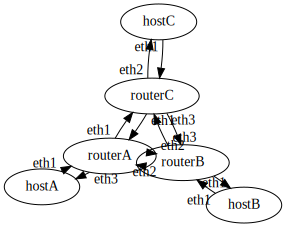

In [7]:
genish.showtopo(manifest,"neato")

In [9]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerA")

,Selected,Network,Next Hop,Interface,Duration
C,True,10.0.0.0/24,directly connected,eth3,None
C,True,127.0.0.0/8,directly connected,lo,None
C,True,172.16.12.0/30,directly connected,eth2,None
C,True,172.16.12.4/30,directly connected,eth1,None


In [8]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerB")

,Selected,Network,Next Hop,Interface,Duration
C,True,10.0.1.0/24,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None
C,True,172.16.12.0/30,directly connected,eth2,None
C,True,172.16.12.8/30,directly connected,eth3,None


In [10]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerC")

,Selected,Network,Next Hop,Interface,Duration
C,True,10.0.2.0/24,directly connected,eth2,None
C,True,127.0.0.0/8,directly connected,lo,None
C,True,172.16.12.4/30,directly connected,eth1,None
C,True,172.16.12.8/30,directly connected,eth3,None


In [11]:
SITE.IPv4Router.addOSPFNetworks(context, SLICE, "routerA", [("10.0.0.0/24", "0.0.0.0"), ("172.16.12.0/30", "0.0.0.0"), ("172.16.12.4/30", "0.0.0.0")])

{'routerA': None}

In [12]:
SITE.IPv4Router.addOSPFNetworks(context, SLICE, "routerB", [("10.0.1.0/24", "0.0.0.0"), ("172.16.12.0/30", "0.0.0.0"), ("172.16.12.8/30", "0.0.0.0")])

{'routerB': None}

In [13]:
SITE.IPv4Router.addOSPFNetworks(context, SLICE, "routerC", [("10.0.2.0/24", "0.0.0.0"), ("172.16.12.4/30", "0.0.0.0"), ("172.16.12.8/30", "0.0.0.0")])

{'routerC': None}

In [14]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerA")

,Selected,Network,Next Hop,Interface,Duration
O,False,10.0.0.0/24 [110/10],directly connected,eth3,00:00:16
C,True,10.0.0.0/24,directly connected,eth3,None
C,True,127.0.0.0/8,directly connected,lo,None
O,False,172.16.12.0/30 [110/10],directly connected,eth2,00:00:16
C,True,172.16.12.0/30,directly connected,eth2,None
O,False,172.16.12.4/30 [110/10],directly connected,eth1,00:00:16
C,True,172.16.12.4/30,directly connected,eth1,None


In [17]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "routerA")

ID,Priority,State,Dead Time,Address,Interface
172.16.12.9,1,Full/DR,31.349s,172.16.12.2,eth2:172.16.12.1
172.16.12.10,1,Full/DR,35.205s,172.16.12.6,eth1:172.16.12.5


In [15]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerB")

,Selected,Network,Next Hop,Interface,Duration
O,False,10.0.1.0/24 [110/10],directly connected,eth1,00:00:18
C,True,10.0.1.0/24,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None
O,False,172.16.12.0/30 [110/10],directly connected,eth2,00:00:18
C,True,172.16.12.0/30,directly connected,eth2,None
O,False,172.16.12.8/30 [110/10],directly connected,eth3,00:00:18
C,True,172.16.12.8/30,directly connected,eth3,None


In [18]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "routerB")

ID,Priority,State,Dead Time,Address,Interface
172.16.12.5,1,Full/Backup,31.808s,172.16.12.1,eth2:172.16.12.2
172.16.12.10,1,Full/DR,39.248s,172.16.12.10,eth3:172.16.12.9


In [19]:
SITE.IPv4Router.getRouteTable(context, SLICE, "routerC")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.0.0.0/24 [110/20],172.16.12.5,eth1,00:04:56
O,True,10.0.1.0/24 [110/20],172.16.12.9,eth3,00:04:57
O,False,10.0.2.0/24 [110/10],directly connected,eth2,00:05:03
C,True,10.0.2.0/24,directly connected,eth2,None
C,True,127.0.0.0/8,directly connected,lo,None
O,True,172.16.12.0/30 [110/20],172.16.12.5,eth1,00:04:56
,False,,172.16.12.9,eth3,00:04:56
O,False,172.16.12.4/30 [110/10],directly connected,eth1,00:04:56
C,True,172.16.12.4/30,directly connected,eth1,None
O,False,172.16.12.8/30 [110/10],directly connected,eth3,00:05:02


In [22]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "routerC")

ID,Priority,State,Dead Time,Address,Interface
172.16.12.5,1,Full/DR,38.543s,172.16.12.5,eth1:172.16.12.6
172.16.12.9,1,Full/DR,32.349s,172.16.12.9,eth3:172.16.12.10


### Traceroute from hostC to hostA

gramasam@cot-cn:~$ gssh gautamrams hostC
/ # traceroute 10.0.0.5
traceroute to 10.0.0.5 (10.0.0.5), 30 hops max, 46 byte packets
 1  10.0.2.254 (10.0.2.254)  0.008 ms  0.011 ms  0.002 ms
 2  172.16.12.5 (172.16.12.5)  0.002 ms  0.012 ms  0.002 ms
 3  10.0.0.5 (10.0.0.5)  0.002 ms  0.012 ms  0.002 ms
 
 / # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
02:49:55.067481 c2:5c:6f:83:b8:22 (oui Unknown) > 01:00:5e:00:00:05 (oui Unknown), ethertype IPv4 (0x0800), length 78: 10.0.0.254 > 224.0.
0.5: OSPFv2, Hello, length 44
02:49:55.067720 92:88:68:7f:75:ae (oui Unknown) > c2:5c:6f:83:b8:22 (oui Unknown), ethertype IPv4 (0x0800), length 82: 10.0.0.5.50654 > 8.
8.8.8.53: 15032+ PTR? 5.0.0.224.in-addr.arpa. (40)
02:49:55.067763 c2:5c:6f:83:b8:22 (oui Unknown) > 92:88:68:7f:75:ae (oui Unknown), ethertype IPv4 (0x0800), length 110: 10.0.0.254 > 10.0.
0.5: ICMP net 8.8.8.8 unreachable, length 76
02:49:57.570348 92:88:68:7f:75:ae (oui Unknown) > c2:5c:6f:83:b8:22 (oui Unknown), ethertype IPv4 (0x0800), length 82: 10.0.0.5.50654 > 8.
8.8.8.53: 15032+ PTR? 5.0.0.224.in-addr.arpa. (40)
02:49:57.570396 c2:5c:6f:83:b8:22 (oui Unknown) > 92:88:68:7f:75:ae (oui Unknown), ethertype IPv4 (0x0800), length 110: 10.0.0.254 > 10.0.
0.5: ICMP net 8.8.8.8 unreachable, length 76
5 packets captured
29 packets received by filter
21 packets dropped by kernel

### Explain TTL and RTT 
Round-trip time (RTT), is the time required for a packet to travel from a specific source to a specific destination and back again and the RTT is 0.0053
Time to live (TTL) or hop limit is a mechanism that limits the lifespan or lifetime of data in a computer or network. TTL may be implemented as a counter or timestamp attached to or embedded in the data and the Time To live is 0.0053 ms

### Observed path as a result of traceroute from hostC to hostA
host C->router C->router A->host A

### Total TTL and RTT of the final packet in traceroute result
TTL of the final packet is 3 and RTT of the final packet is 0.0053 ms

In [19]:
SITE.portDown(context, SLICE, "routerC:1")

{}

### New traceroute from hostC to hostA

/ # traceroute 10.0.0.5
traceroute to 10.0.0.5 (10.0.0.5), 30 hops max, 46 byte packets
 1  10.0.2.254 (10.0.2.254)  0.007 ms  0.012 ms  0.001 ms
 2  172.16.12.9 (172.16.12.9)  0.002 ms  0.013 ms  0.002 ms
 3  172.16.12.1 (172.16.12.1)  0.003 ms  0.012 ms  0.002 ms
 4  10.0.0.5 (10.0.0.5)  0.002 ms  0.011 ms  0.002 ms

/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
03:03:15.094530 c2:5c:6f:83:b8:22 (oui Unknown) > 01:00:5e:00:00:05 (oui Unknown), ethertype IPv4 (0x0800), length 78: 10.0.0.254 > 224.0.
0.5: OSPFv2, Hello, length 44
03:03:15.094777 92:88:68:7f:75:ae (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.5,
length 28
03:03:15.094821 c2:5c:6f:83:b8:22 (oui Unknown) > 92:88:68:7f:75:ae (oui Unknown), ethertype ARP (0x0806), length 42: Reply 10.0.0.254 is-
at c2:5c:6f:83:b8:22 (oui Unknown), length 28
03:03:15.094825 92:88:68:7f:75:ae (oui Unknown) > c2:5c:6f:83:b8:22 (oui Unknown), ethertype IPv4 (0x0800), length 82: 10.0.0.5.43881 > 8.
8.8.8.53: 3073+ PTR? 5.0.0.224.in-addr.arpa. (40)
03:03:15.094851 c2:5c:6f:83:b8:22 (oui Unknown) > 92:88:68:7f:75:ae (oui Unknown), ethertype IPv4 (0x0800), length 110: 10.0.0.254 > 10.0.
0.5: ICMP net 8.8.8.8 unreachable, length 76
5 packets captured
29 packets received by filter
19 packets dropped by kernel

### ) Explain new TTL and RTT
TTL:As we have shut the port down,the packet is travelled through an alternate route and the alternate route total hops are increased from 3 to 4.
RTT:Time is changed  from 0.0053 ms to 0.005 ms

### new path of packets from hostC to hostA 
host C->router C->router B->router A->host A

### New Total TTL and RTT of the final packet in traceroute result
New TTL of the final packet is 4 and RTT of the final packet is 0.005 ms